In [1]:
import mdtraj as md
import dask_traj as dmd
import dask
import itertools as itt
#dask.config.set(scheduler='sync')

In [2]:
xtc = '54.xtc'
gro = '54.gro'
xyz = '54.xyz'

In [3]:
%%time
dask_traj = dmd.load(xtc, top=gro, chunks=100)

CPU times: user 2.17 s, sys: 204 ms, total: 2.37 s
Wall time: 2.36 s


In [4]:
%time mdtraj = md.load(xtc, top=gro)

CPU times: user 2.18 s, sys: 224 ms, total: 2.41 s
Wall time: 2.25 s


In [5]:
mdtraj

<mdtraj.Trajectory with 2411 frames, 12287 atoms, 3455 residues, and unitcells at 0x7fa585f55b70>

In [6]:
#make some atom pairs
c = list(itt.combinations(range(500),2))

In [7]:
len(c)

124750

In [8]:
%%time
md_result = md.compute_distances(mdtraj, atom_pairs=c) 

CPU times: user 2.9 s, sys: 288 ms, total: 3.18 s
Wall time: 3.17 s


In [9]:
%%time 
dmd_result = dmd.compute_distances(dask_traj, atom_pairs=c)

CPU times: user 88 ms, sys: 4 ms, total: 92 ms
Wall time: 89 ms


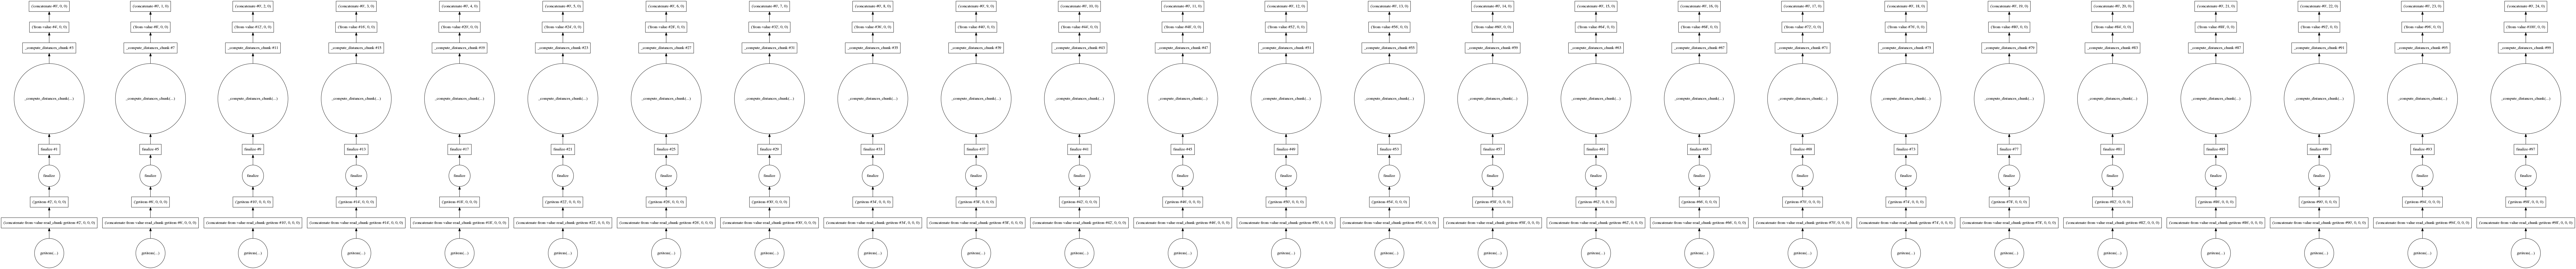

In [10]:
dmd_result.visualize()

In [11]:
%%time 
dmd_result.compute()

CPU times: user 1.88 s, sys: 148 ms, total: 2.02 s
Wall time: 2 s


array([[2.1611342, 2.6782956, 1.9420466, ..., 1.7841287, 1.0499086,
        2.0937111],
       [2.5737753, 2.2025354, 1.627395 , ..., 2.5285099, 1.235928 ,
        2.5281487],
       [2.6552968, 2.1935244, 2.0511658, ..., 2.3345368, 2.3525074,
        0.9379349],
       ...,
       [2.1255145, 2.6030016, 2.924027 , ..., 2.8466678, 2.5089889,
        2.3687158],
       [1.190565 , 2.345972 , 2.4458716, ..., 2.172305 , 1.1168351,
        2.9440033],
       [2.7627418, 2.373189 , 2.3774805, ..., 3.2708514, 1.1969203,
        3.1195817]], dtype=float32)

In [12]:
assert md_result.all() == dmd_result.all() 

In [13]:
print(dmd_result)

dask.array<concatenate, shape=(2411, 124750), dtype=float32, chunksize=(100, 124750)>
